# Pruebas de hipótesis

Vamos a analizar los tamaños de los cerebros en las personas


In [1]:
from scipy import stats
import pandas

Leer el archivo

In [5]:
data = pandas.read_csv('01_brain_size.csv', sep=';', na_values=".")
print(data.size)
print(data.shape)
data.head(5)

320
(40, 8)


,ID,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [6]:
data.describe()

,ID,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


**¿Qué nos permite identificar una primera exploración de los datos?**

Vamos a comparar los promedios de uno de los atributos que definen el tamaño del cerebro ("VIQ") para las muestra de hombres y mujeres.

In [7]:
prom_mujeres = data[data['Gender'] == 'Female']['VIQ'].mean()
prom_hombres = data[data['Gender'] == 'Male']['VIQ'].mean()
print("prom_mujeres=", prom_mujeres)
print("prom_hombres=", prom_hombres)

prom_mujeres= 109.45
prom_hombres= 115.25


Esto también se puede hacer utilizando **groupby** de pandas, que realiza operaciones de agregación para cada atributo del dataframe particionado por los atributos específicados:

In [8]:
agg_genero = data.groupby('Gender')
agg_genero.describe().transpose()

Gender                  Female          Male
FSIQ      count      20.000000  2.000000e+01
          mean      111.900000  1.150000e+02
          std        23.686327  2.498631e+01
          min        77.000000  8.000000e+01
          25%        90.250000  8.975000e+01
          50%       115.500000  1.180000e+02
          75%       133.000000  1.392500e+02
          max       140.000000  1.440000e+02
Height    count      20.000000  1.900000e+01
          mean       65.765000  7.143158e+01
          std         2.288248  3.283131e+00
          min        62.000000  6.630000e+01
          25%        64.500000  6.890000e+01
          50%        66.000000  7.050000e+01
          75%        66.875000  7.375000e+01
          max        70.500000  7.700000e+01
ID        count      20.000000  2.000000e+01
          mean       19.650000  2.135000e+01
          std        11.356774  1.224863e+01
          min         1.000000  2.000000e+00
          25%        10.250000  1.150000e+01
          50%        18.000000  2.150000e+01
          75%        29.250000  3.225000e+01
          max        38.000000  4.000000e+01
MRI_Count count      20.000000  2.000000e+01
          mean   862654.600000  9.548554e+05
          std     55893.555780  5.591135e+04
          min    790619.000000  8.799870e+05
          25%    828062.000000  9.195292e+05
          50%    855365.000000  9.472415e+05
          75%    882668.500000  9.734960e+05
          max    991305.000000  1.079549e+06
PIQ       count      20.000000  2.000000e+01
          mean      110.450000  1.116000e+02
          std        21.946046  2.354033e+01
          min        72.000000  7.400000e+01
          25%        93.000000  8.600000e+01
          50%       115.000000  1.170000e+02
          75%       128.750000  1.280000e+02
          max       147.000000  1.500000e+02
VIQ       count      20.000000  2.000000e+01
          mean      109.450000  1.152500e+02
          std        21.670924  2.564099e+01
          min        71.000000  7.700000e+01
          25%        90.000000  9.525000e+01
          50%       116.000000  1.105000e+02
          75%       129.000000  1.450000e+02
          max       136.000000  1.500000e+02
Weight    count      20.000000  1.800000e+01
          mean      137.200000  1.664444e+02
          std        16.953807  2.004766e+01
          min       106.000000  1.320000e+02
          25%       125.750000  1.487500e+02
          50%       138.500000  1.720000e+02
          75%       146.250000  1.807500e+02
          max       175.000000  1.920000e+02

Se pueden obtener los datos específicos a un operador de agregación como el promedio:

In [9]:
agg_genero.mean()

,ID,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

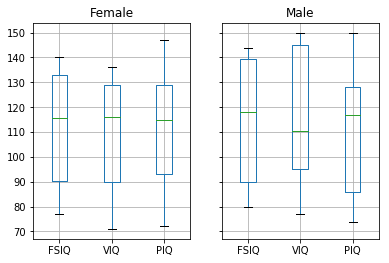

In [12]:
agg_genero.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

# Prueba de 1 media

Se hicieron medidas del VIQ en el pasado y se obtuvo un promedio de 110 para los hombres y 99 para las mujeres.
Se tomaron muestras actuales y al parecer los valores promedios de VIQ indicarían a primera vista que hay cambios en los valores del VIQ.

In [11]:
print("Hombres(VIQ):", data[data['Gender'] == 'Male']['VIQ'].mean())
print("Mujeres(VIQ):", data[data['Gender'] == 'Female']['VIQ'].mean())

Hombres(VIQ): 115.25
Mujeres(VIQ): 109.45


Queremos analizar estadísticamente si estas medidas han cambiado o siguen iguales a partir del análisis de las muestras de las que disponemos.

1. **Establezca la prueba a realizar (hipótesis nula, alternativa, tipo de prueba, confianza, significancia, posibles conclusiones)**
2. **Utilice scipy.stats para ejecutar la prueba**

## Prueba para los hombres

**H0**: los hombres siguen teniendo un valor de VIQ de 110. $\mu_{Hombres}=110$

**Ha**: los hombres ya no tienen un valor de VIQ de 110. $\mu_{Hombres}\neq 110$

Se va a realizar una prueba T de 1 medial, con un nivel de confianza del 95%, por lo que la significancia (alpha) sera del 5%.

Las posibles conclusiones son:
* Si el valor-p < alpha: se rechaza la hipótesis nula en favor de la hipótesis alternativa, por lo que se puede decir, con un nivel de confianza del 95%, que los hombres ya no tienen un valor de VIQ de 110.
* Si el valor-p > alpha: no se puede rechazar la hipótesis nula, puede que no haya suficiente información para hacerlo, por lo que no se puede decir, con un nivel de confianza del 95%, si los hombres siguen teniendo un VIQ de 110 o no.

In [9]:
from scipy import stats

In [10]:
stats.ttest_1samp(data[data['Gender'] == 'Male']['VIQ'], 110)

Ttest_1sampResult(statistic=0.9156709994481053, pvalue=0.3713154747160655)

Como tenemos que el valor-P es de 37.13%, superior al nivel de significancia de 5%, no podemos rechazar la hipótesis nula, y no podemos decir si el valor del VIQ de los hombres ha cambiado o no.

## Prueba para las mujeres

**H0**: las mujeres siguen teniendo un valor de VIQ de 99. $\mu_{Mujeres}=99$

**Ha**: las mujeres ya no tienen un valor de VIQ de 99. $\mu_{Mujeres}\neq 99$

Se va a realizar una prueba T de 1 medial, con un nivel de confianza del 95%, por lo que la significancia (alpha) sera del 5%.

Las posibles conclusiones son:
* Si el valor-p < alpha: se rechaza la hipótesis nula en favor de la hipótesis alternativa, por lo que se puede decir, con un nivel de confianza del 95%, que las mujeres ya no tienen un valor de VIQ de 99.
* Si el valor-p > alpha: no se puede rechazar la hipótesis nula, puede que no haya suficiente información para hacerlo, por lo que no se puede decir, con un nivel de confianza del 95%, si las mujeres siguen teniendo un VIQ de 99 o no.

In [11]:
stats.ttest_1samp(data[data['Gender'] == 'Female']['VIQ'], 99)

Ttest_1sampResult(statistic=2.15652183137645, pvalue=0.04406616069561085)

Como tenemos que el valor-P es de 4.41%, inferior al nivel de significancia de 5%, podemos rechazar la hipótesis nula en favor de la hipótesis alternativa, y concluir que el valor del VIQ de las mujeres ya no es de 99.

# Prueba de diferencia de medias

Ahora queremos comparar los valores actuales del VIQ de los hombres y las mujeres para establecer si son iguales o no.

1. **Establezca la prueba a realizar (hipótesis nula, alternativa, tipo de prueba, confianza, significancia, posibles conclusiones)**
2. **Utilice scipy.stats para ejecutar la prueba**

**H0**: los hombres y las mujeres tienen cerebros (medida VIQ) del mismo tamaño

**Ha**: los hombres y las mujeres tienen cerebros (medida VIQ) de tamaño diferente

Se va a realizar una prueba T de muestras independientes, con un nivel de confianza del 95%, por lo que la significancia (alpha) sera del 5%.

Las posibles conclusiones son:
* Si el valor-p < alpha: se rechaza la hipótesis nula en favor de la hipótesis alternativa, por lo que se puede decir, con un nivel de confianza del 95%, que los cerebros de los hombres son diferentes a los de las mujeres.
* Si el valor-p > alpha: no se puede rechazar la hipótesis nula, puede que no haya suficiente información para hacerlo, por lo que no se puede decir, con un nivel de confianza del 95%, si los cerebros de los hombres son diferentes a los de las mujeres o no.


In [12]:
stats.ttest_ind(data[data['Gender'] == 'Male']['VIQ'], data[data['Gender'] == 'Female']['VIQ'])

Ttest_indResult(statistic=0.7726161723275011, pvalue=0.44452876778583217)

Como tenemos que el valor-P es de 44.45%, superior al nivel de significancia de 5%, no podemos rechazar la hipótesis nula, y no podemos decir si el valor del VIQ de los hombres es diferente al de las mujeres.

<font color='red'>Realice las pruebas comparando los valores de los atributos PIQ y FSIQ para hombre y mujeres y concluya.</font>